In [30]:
from func import np, f1_score_cal, display_df, path, path_img, get_data, pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = get_data(path / 'train.csv')
df_img = pd.read_feather(path / 'img_pred.ftr')
df_text = pd.read_feather(path / 'text_pred.ftr')

In [28]:
final = df[['posting_id', 'target']].merge(df_img, on='posting_id', how='left')
final = final.merge(df_text, on='posting_id', how='left', suffixes=('_img', '_text'))
final['pred'] = [list(set(list(x) + list(y))) for x, y in final[['img_pred', 'text_pred']].values]
final['f1_score'] = [f1_score_cal(i, v) for i, v in final[['target', 'pred']].values]

print(f"CV score for baseline = {final['f1_score'].mean():.3f}")
final.head()

CV score for baseline = 0.154


,posting_id,target,img_pred,f1_score_img,text_pred,f1_score_text,pred,f1_score
0,train_129225211,"[train_129225211, train_2278313361]",[train_129225211],0.666667,"[train_2278313361, train_129225211]",1.000000,"[train_129225211, train_2278313361]",1.000000
1,train_3386243561,"[train_3386243561, train_3423213080]",[train_3386243561],0.666667,"[train_860027362, train_211200223, train_19749...",0.571429,"[train_3423213080, train_3386243561, train_860...",0.571429
2,train_2288590299,"[train_3803689425, train_2288590299]","[train_2288590299, train_3630936139, train_366...",0.038462,"[train_2288590299, train_3803689425]",1.000000,"[train_3758642579, train_1768881373, train_527...",0.075472
3,train_2406599165,"[train_2406599165, train_3342059966]","[train_2406599165, train_2594893028, train_254...",0.038462,"[train_2406599165, train_2043094887, train_352...",0.200000,"[train_964138261, train_1748381393, train_3188...",0.033898
4,train_3369186413,"[train_3369186413, train_921438619]","[train_3369186413, train_413507128, train_1122...",0.038462,[train_3369186413],0.666667,"[train_413507128, train_2615355809, train_3586...",0.038462


Text(0, 0.5, '')

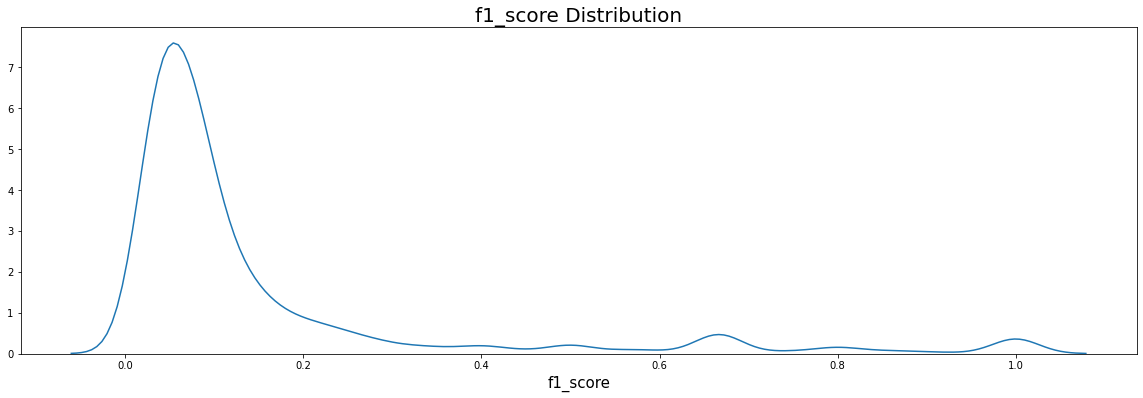

In [31]:
plt.figure(figsize = (20, 6))

plot = sns.kdeplot(x = final["f1_score"])
plt.title("f1_score Distribution", fontsize=20)
plt.xlabel("f1_score", fontsize=15)
plt.ylabel("")